**Classic ML Exercise using Neural Networks: Image Classification**

Objective: Build and train a neural network to classify images from a standard dataset.

Task Details:

- Using a public dataset select a dataset for image classification (e.g., MNIST for digit recognition, CIFAR-10 for object recognition).
- Design a neural network architecture suitable for the task.
- Train your model on the dataset and test its performance.
- Discuss any overfitting or underfitting issues and how you addressed them.

Import necessary libraries for the CNN model.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Define the data loading and preprocessing function. This function will load the CIFAR-10 dataset and apply preprocessing steps such as normalizing the image data.

In [3]:
# Define the function to load and preprocess data
def load_and_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    
    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    
    return (train_images, train_labels), (test_images, test_labels)

Define the CNN model architecture. This includes convolutional layers for feature extraction and dense layers for classification.

In [4]:
# Define the function to create the CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

Load and preprocess the data

In [5]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = load_and_preprocess_data()


Create and compile the CNN model with the Adam optimizer, cross-entropy loss function, and accuracy metric.

In [6]:
# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model on the training data for 15 epochs and validate it on the test data. Then, save the trained model to a file.

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

# Save the trained model
model.save("cnn_model.h5")

Epoch 1/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5491 - accuracy: 0.4361 - val_loss: 1.3271 - val_accuracy: 0.5259
Epoch 2/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2018 - accuracy: 0.5719 - val_loss: 1.1301 - val_accuracy: 0.5942
Epoch 3/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0471 - accuracy: 0.6314 - val_loss: 1.0178 - val_accuracy: 0.6446
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9505 - accuracy: 0.6657 - val_loss: 1.0509 - val_accuracy: 0.6338
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8778 - accuracy: 0.6919 - val_loss: 0.9392 - val_accuracy: 0.6763
Epoch 6/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8161 - accuracy: 0.7157 - val_loss: 0.8895 - val_accuracy: 0.6879
Epoch 7/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7649 - accuracy: 0.7337 - val_loss: 0.8873 -

Based on the epoch results you provided, we can see the following:

* The training loss decreased consistently across epochs, from 1.5491 to 0.4822, which indicates the model is learning and improving its performance on the training set.

* The training accuracy increased from 43.61% to 83.03%, which is a substantial improvement and shows the model is becoming better at classifying the training images.

* The validation loss decreased initially but started to increase after the 6th epoch, suggesting that the model began to overfit the training data at that point.

* The validation accuracy improved initially but then fluctuated and did not show a significant increase after the 9th epoch, which further indicates overfitting.

Load the saved model and evaluate its performance on the test dataset to obtain the final accuracy.

In [8]:
# Evaluate the model
model = tf.keras.models.load_model("cnn_model.h5")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.9604 - accuracy: 0.7030 - 3s/epoch - 8ms/step

Test accuracy: 0.703000009059906


Visualize the training and validation accuracy to assess the model's performance over epochs.

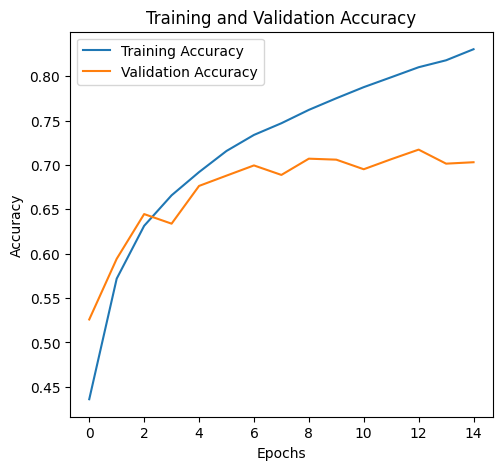

In [9]:
import matplotlib.pyplot as plt

# After training the model
history_dict = history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Training and Validation Accuracy:

* The training accuracy continues to increase over time, which is a good sign that the model is learning from the training data.
* The validation accuracy increases initially but then plateaus and even decreases slightly. This suggests the model may be beginning to overfit to the training data.
 
Overfitting is indicated by the training accuracy being significantly higher than the validation accuracy and the validation accuracy not improving or starting to decrease as training progresses.

Visualize the training and validation loss to identify any overfitting or underfitting during training.

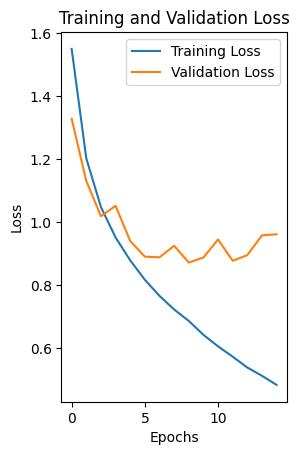

In [10]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Training and Validation Loss:

* The training loss decreases consistently, which is expected during the learning process.
* The validation loss decreases initially but then fluctuates and trends upwards in the later epochs, which is another sign of overfitting.


Define a function to make predictions with the trained model on new images. Then, visualize the model's predictions on a subset of the training images to compare actual labels with predicted ones.


1/1 [==============================] - 0s 39ms/step


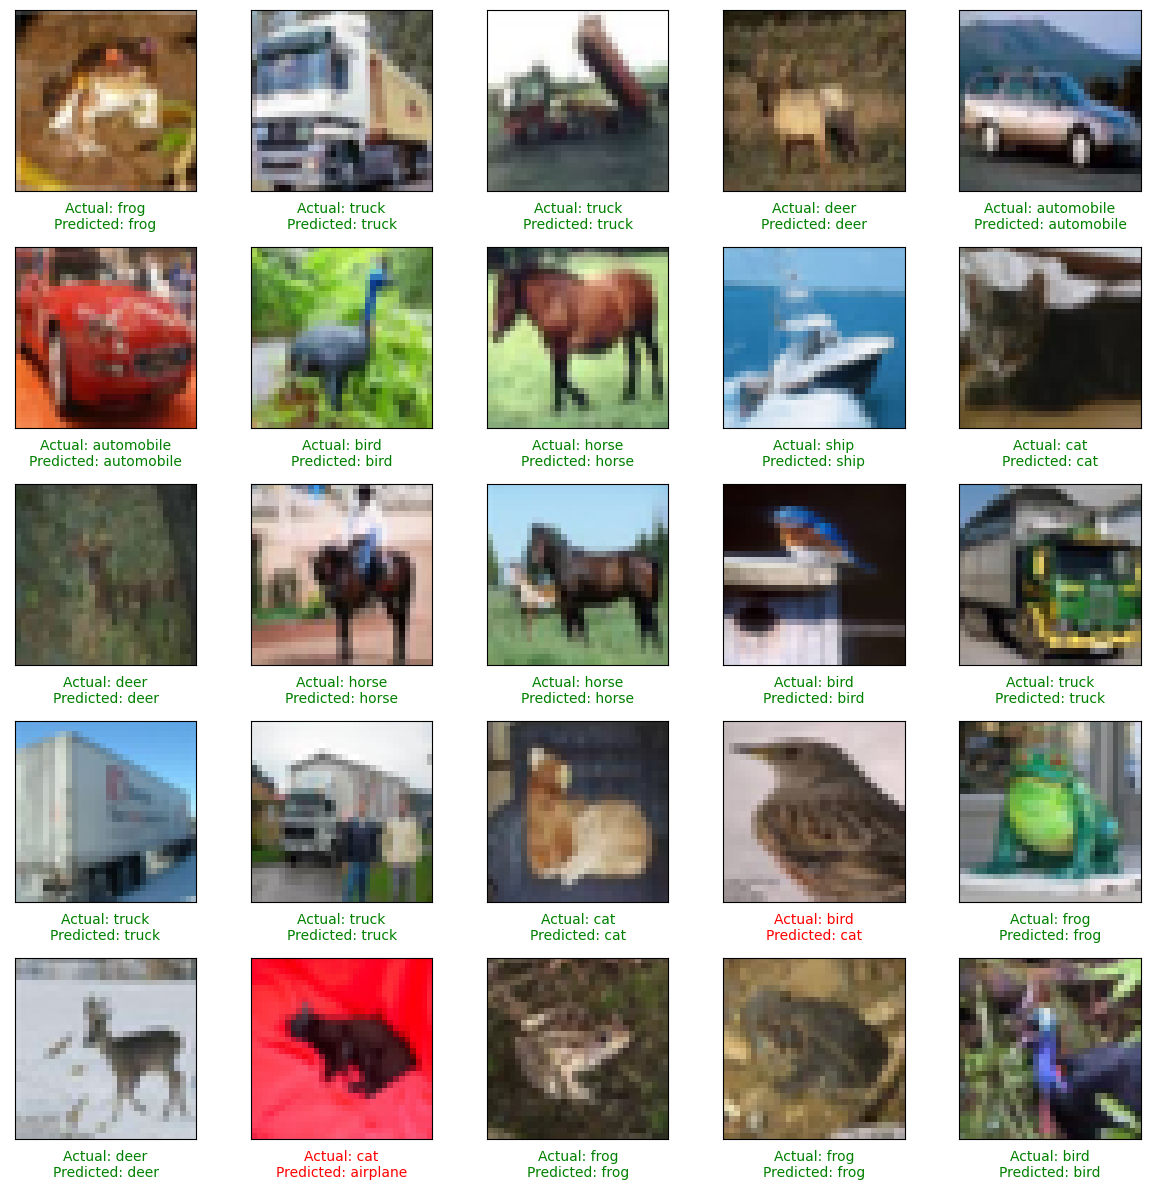

In [12]:
# Define the predict_new_images function
def predict_new_images(model, new_images):
    predictions = model.predict(new_images)
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

# Use the predict_new_images function to predict on a subset of the training images
predicted_classes = predict_new_images(model, train_images[:25])

# Visualization function with predictions
def visualize_with_predictions(images, true_labels, predicted_labels):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    plt.figure(figsize=(12,12))  # Increase figure size
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        true_label = class_names[true_labels[i][0]]
        pred_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == pred_label else 'red'
        plt.xlabel(f"Actual: {true_label}\nPredicted: {pred_label}", color=color, fontsize=10)  # Decrease font size

    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing
    plt.tight_layout()
    plt.show()


# Visualize the first 25 images from the training set with their predictions
visualize_with_predictions(train_images, train_labels, predicted_classes)